# 作業 3-2
Online Shoppers Purchasing Intention
 - 藉由可獲得之資料預測網路Shoppers是否會購買商品(Classification)


## 環境

請填寫當前執行使用的環境。

|環境|名稱|版本|
|-|-|-|
|作業系統|Windows|10|
|程式執行環境|Colaboratory||
|python 版本|python3|3.6.9|
|安裝環境|pip|20.0.2|

## 安裝

安裝套件需要的指令

```sh
pip install -r requirements.txt
```

## 計算資源



|計算資源|答案|
|-|-|
|使用 CPU 核心數|1|
|記憶體需求|$\leq 1$GB|
|有無使用 GPU|無|
|GPU 版本|無|
|GPU 記憶體需求|$\leq 1$GB|

## 資料來源

- Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018).：https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset#


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


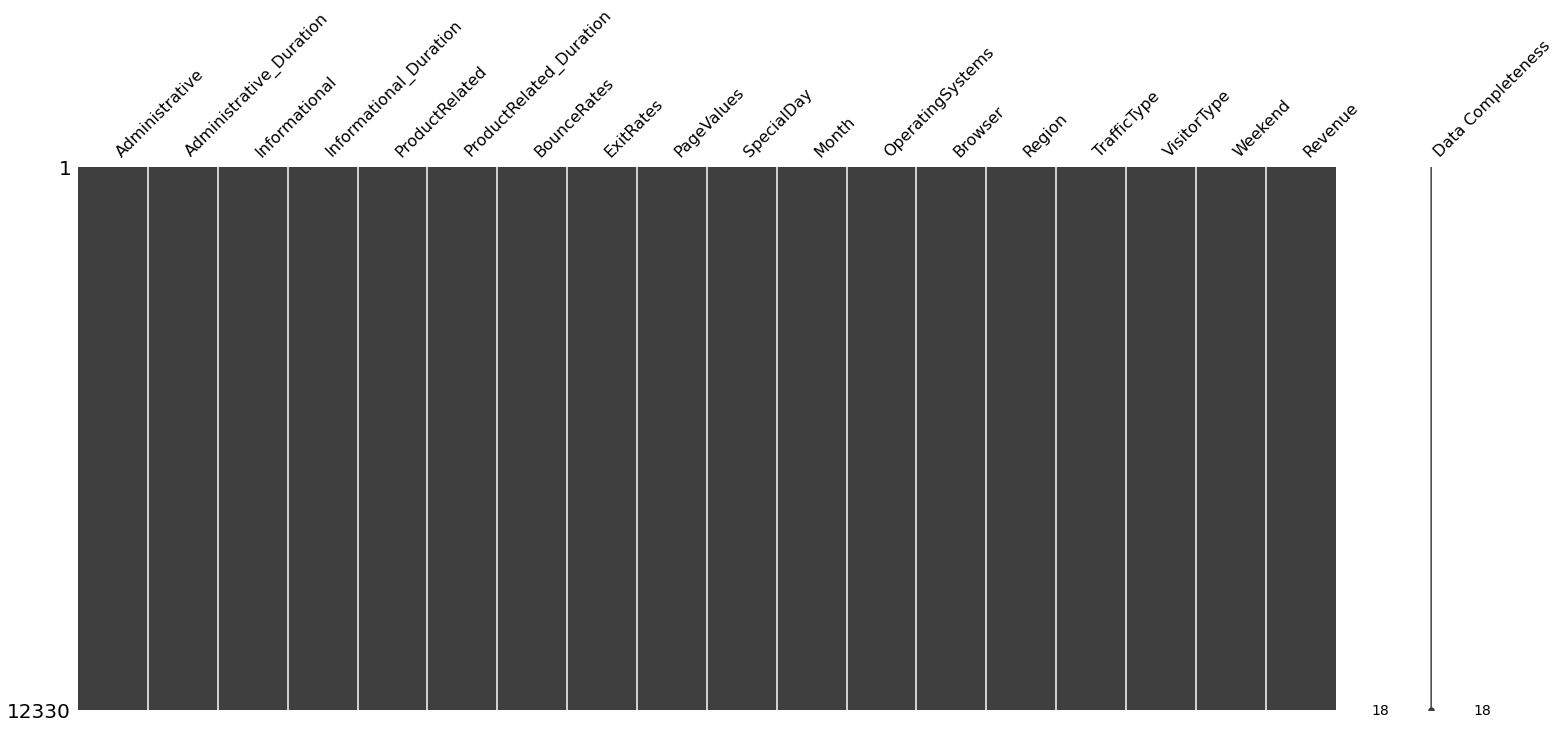

In [1]:
# 請勿更動此區塊程式碼

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # 繪圖函式庫
import missingno as msno        # 將缺失值可視化的函式庫


EXECUTION_START_TIME = time.time() # 計算執行時間

df = pd.read_csv('online_shoppers_intention.csv')      # 讀取訓練資料，請勿更改路徑
msno.matrix(df, labels=True)                           # 查看訓練資料相關資訊是否缺失
df.info()                                              # 查看訓練資料相關資訊類型
df.describe()                                          # 查看訓練資料的敘述性統計 



## 資料分析與前處理
1. 利用info()和msno.matrix()函式得知train data裡的資料筆數及型態，每個欄位皆有12330筆的資料，並無缺失，因此不須填補資料。
2. 由於Month,VisitorType,Weeken,Revenue的資料型態前兩者為object後兩者為boolean，因此利用LabelEncoder()給予類別數值資料。
3. 利用corr()函式得出各資料欄位間的相關係數，可觀察出ExitRates和BounceRates之相關係數高達0.91，因此排除ExitRates資料欄位。
4. 將Revenue欄位的值取出，並設為答案資料。
5. 由於TrafficType在顧客尚未訂購的狀況下，無法得知其運送方式，因此不應列為幫助預測之變數。而Browser則是主觀認為現代人所使用的瀏覽器幾乎大同小異並不會造成太大影響，在第一次實驗中先將Browser資料刪除，因此將上述兩項一同從預測變數中排除，加上Revenue答案欄位共計排除四個資料欄位，在第二次實驗才將Browser資料重新加入預測變數，觀察其變化。
6. 透過train_test_split將資料分為train set和test set
6. 畫出各資料欄位的長條圖




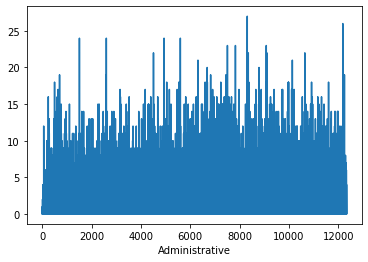

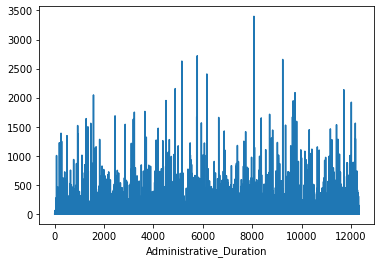

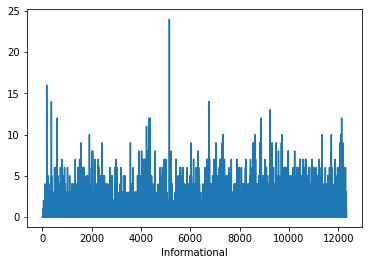

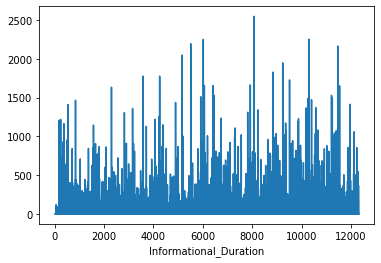

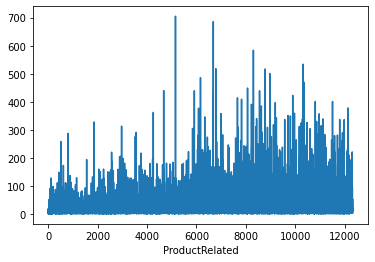

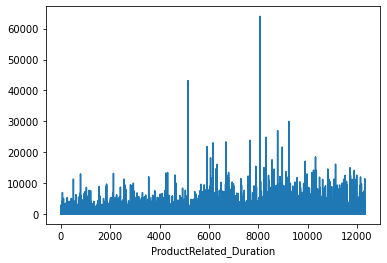

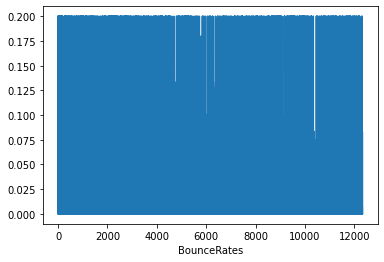

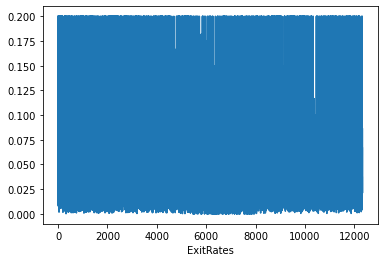

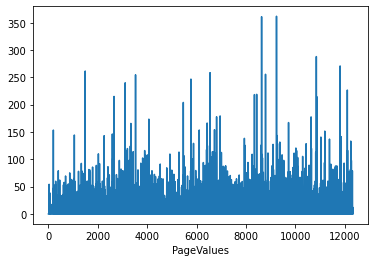

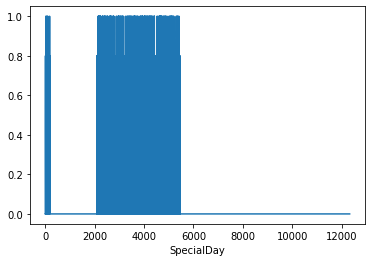

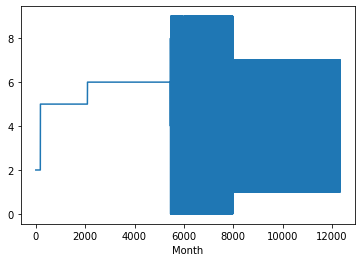

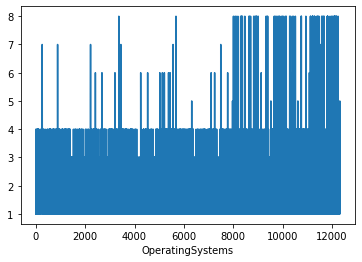

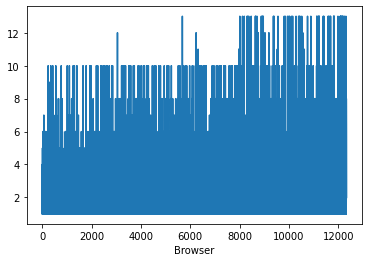

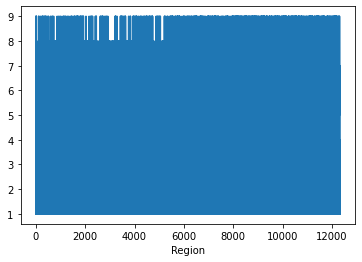

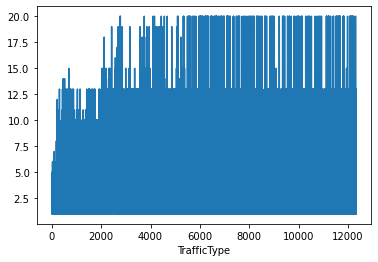

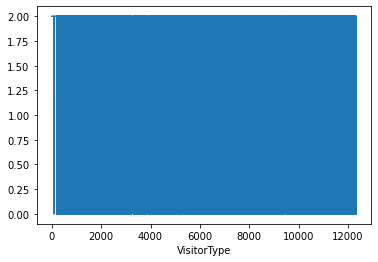

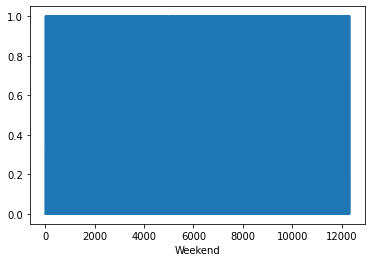

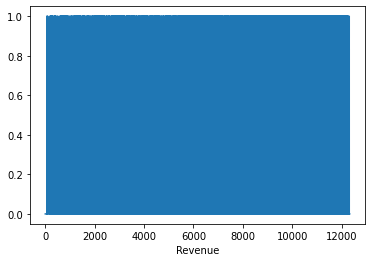

In [2]:
# 資料分析與前處理
from sklearn.preprocessing import LabelEncoder          # 匯入 Label Encoder
from sklearn.model_selection import train_test_split    # 匯入將資料分為train和test的函式庫

le = LabelEncoder()                                         # 創造 Label Encoder
# 利用迴圈給予Month,VisitorType,Weekend,Revenue四項資料label
for i in ('Month', 'VisitorType', 'Weekend', 'Revenue'):
  df[i] = le.fit_transform(df[i])

# 創建包含所有資料欄位名稱之列表
name = ['Administrative',	'Administrative_Duration',	'Informational',	'Informational_Duration',	'ProductRelated',	'ProductRelated_Duration',	'BounceRates',	'ExitRates',	'PageValues',	'SpecialDay','Month',	'OperatingSystems',	'Browser',	'Region',	'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
# 利用迴圈畫出各資料欄位之數據
for i in range(0, 18):
  x = range(0, len(df['Revenue']))
  y = df.iloc[:, i]
  
  plt.xlabel(name[i])
  plt.plot(x, y)
  plt.show()

In [3]:
df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,0.048560,-0.006347,-0.025035,-0.005487,-0.033561,-0.025820,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,0.029061,-0.007343,-0.015392,-0.005561,-0.014376,-0.023940,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,0.019743,-0.009527,-0.038235,-0.029169,-0.034491,0.055828,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,0.005987,-0.009579,-0.019285,-0.027144,-0.024675,0.044677,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.070299,0.004290,-0.013146,-0.038122,-0.043064,0.126656,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.061186,0.002976,-0.007380,-0.033091,-0.036377,0.119329,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,-0.023763,0.023823,-0.015772,-0.006485,0.078286,0.135536,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,-0.039049,0.014567,-0.004442,-0.008907,0.078616,0.179144,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.021780,0.018508,0.045592,0.011315,0.012532,-0.111228,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.079341,0.012652,0.003499,-0.016098,0.052301,0.085557,-0.016767,-0.082305


## 實驗一-排除ExitRates,TrafficType,Browser三個參數並用羅吉斯回歸、隨機森林、簡單貝氏、神經網路訓練模型

In [4]:
data_y = df['Revenue']                                                            # 將Revenue資料取出作為答案
data_x = df.drop(['Revenue', 'ExitRates', 'TrafficType', 'Browser'], axis=1)      # 將四項資料欄位刪除作為預測變數

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, train_size = 0.8, random_state = 1012)  # 將資料分為train set和test set

# 印出訓練和測試集
for i in (train_x, test_x, train_y, test_y):
  print(i)

       Administrative  Administrative_Duration  ...  VisitorType  Weekend
8063                0                 0.000000  ...            0        0
3334                2                98.000000  ...            2        0
1769                1                14.000000  ...            2        0
10020               1                 0.000000  ...            2        0
9031                9               189.109848  ...            2        1
...               ...                      ...  ...          ...      ...
4426                0                 0.000000  ...            2        0
8593               12               651.875000  ...            2        0
3525                0                 0.000000  ...            2        0
10214               0                 0.000000  ...            2        0
7510                3                40.200000  ...            2        1

[9864 rows x 14 columns]
       Administrative  Administrative_Duration  ...  VisitorType  Weekend
7888        

## 模型訓練


- **選擇模型**
    - 羅吉斯回歸
    - 隨機森林
    - 簡單貝氏
    - 神經網路
- 計算**準確度（Accuracy）**
    - 使用 **5-fold cross validation**，輸出**平均準確度**

    


In [5]:
# 模型訓練

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.ensemble import RandomForestClassifier   # 匯入隨機森林模型
from sklearn.naive_bayes import GaussianNB            # 匯入簡單貝氏模型
from sklearn import preprocessing, linear_model       # 匯入羅吉斯回歸模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具

kf = KFold(n_splits=5,                                # 設定 K 值，切成五份
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list_lr = []                                   # 儲存羅吉斯回歸每次訓練模型的準確度
valid_acc_list_lr = []                                   # 儲存羅吉斯回歸每次驗證模型的準確度
train_acc_list_rf = []                                   # 儲存隨機森林每次訓練模型的準確度
valid_acc_list_rf = []                                   # 儲存隨機森林每次驗證模型的準確度
train_acc_list_nb = []                                   # 儲存簡單貝氏每次訓練模型的準確度
valid_acc_list_nb = []                                   # 儲存簡單貝氏每次驗證模型的準確度


for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
    lrmodel = linear_model.LogisticRegression(random_state=1012, max_iter=3000)             # 創造羅吉斯回歸模型，最多迭代3000次
    lrmodel.fit(train_x_split, train_y_split.to_numpy().flatten())           # 訓練羅吉斯回歸模型
    
    train_pred_y_lr = lrmodel.predict(train_x_split)     # 確認羅吉斯回歸模型是否訓練成功
    train_acc_lr = accuracy_score(train_y_split,         # 計算羅吉斯回歸訓練資料準確度
                               train_pred_y_lr)
    valid_pred_y_lr = lrmodel.predict(valid_x_split)     # 驗證羅吉斯回歸模型是否訓練成功
    valid_acc_lr = accuracy_score(valid_y_split,         # 計算羅吉斯回歸驗證資料準確度
                               valid_pred_y_lr)
    
    train_acc_list_lr.append(train_acc_lr)               # 將準度加到儲存羅吉斯回歸訓練模型的list中
    valid_acc_list_lr.append(valid_acc_lr)               # 將準度加到儲存羅吉斯回歸驗證模型的list中


    rfmodel = RandomForestClassifier(random_state=1012)                      # 創造隨機森林模型
    rfmodel.fit(train_x_split, train_y_split.to_numpy().flatten())           # 訓練隨機森林模型
    
    train_pred_y_rf = rfmodel.predict(train_x_split)       # 確認隨機森林模型是否訓練成功
    train_acc_rf = accuracy_score(train_y_split,           # 計算隨機森林訓練資料準確度
                               train_pred_y_rf)
    valid_pred_y_rf = rfmodel.predict(valid_x_split)       # 驗證隨機森林模型是否訓練成功
    valid_acc_rf = accuracy_score(valid_y_split,           # 計算隨機森林驗證資料準確度
                               valid_pred_y_rf)
    
    train_acc_list_rf.append(train_acc_rf)                 # 將準度加到儲存隨機森林訓練模型的list中
    valid_acc_list_rf.append(valid_acc_rf)                 # 將準度加到儲存隨機森林驗證模型的list中


    nbmodel = GaussianNB()                                                # 創造簡單貝氏模型
    nbmodel.fit(train_x_split, train_y_split.to_numpy().flatten())        # 訓練簡單貝氏模型
    
    train_pred_y_nb = nbmodel.predict(train_x_split)       # 確認簡單貝氏模型是否訓練成功
    train_acc_nb = accuracy_score(train_y_split,           # 計算簡單貝氏訓練資料準確度
                               train_pred_y_nb)
    valid_pred_y_nb = nbmodel.predict(valid_x_split)       # 驗證簡單貝氏模型是否訓練成功
    valid_acc_nb = accuracy_score(valid_y_split,           # 計算簡單貝氏驗證資料準確度
                               valid_pred_y_nb)
    
    train_acc_list_nb.append(train_acc_nb)                 # 將準度加到儲存簡單貝氏訓練模型的list中
    valid_acc_list_nb.append(valid_acc_nb)                 # 將準度加到儲存簡單貝氏訓練模型的list中

    

print((
    'logistic regression average train accuracy: {}\n' +
    '                        min train accuracy: {}\n' +
    '                        max train accuracy: {}\n' +
    'logistic regression average valid accuracy: {}\n' +
    '                        min valid accuracy: {}\n' +
    '                        max valid accuracy: {}').format(
    np.mean(train_acc_list_lr),                          # 輸出平均訓練準確度
    np.min(train_acc_list_lr),                           # 輸出最低訓練準確度
    np.max(train_acc_list_lr),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list_lr),                          # 輸出平均驗證準確度
    np.min(valid_acc_list_lr),                           # 輸出最低驗證準確度
    np.max(valid_acc_list_lr)                            # 輸出最高驗證準確度
))

test_pred_y_lr = lrmodel.predict(test_x)       # 驗證模型是否訓練成功
test_acc_lr = accuracy_score(test_y,         # 計算驗證資料準確度
                           test_pred_y_lr)
print(('logistic regression test accuracy: {}\n').format(test_acc_lr))



print((
    'random forest average train accuracy: {}\n' +
    '                  min train accuracy: {}\n' +
    '                  max train accuracy: {}\n' +
    'random forest average valid accuracy: {}\n' +
    '                  min valid accuracy: {}\n' +
    '                  max valid accuracy: {}').format(
    np.mean(train_acc_list_rf),                          # 輸出平均訓練準確度
    np.min(train_acc_list_rf),                           # 輸出最低訓練準確度
    np.max(train_acc_list_rf),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list_rf),                          # 輸出平均驗證準確度
    np.min(valid_acc_list_rf),                           # 輸出最低驗證準確度
    np.max(valid_acc_list_rf)                            # 輸出最高驗證準確度
))

test_pred_y_rf = rfmodel.predict(test_x)       # 驗證模型是否訓練成功
test_acc_rf = accuracy_score(test_y,         # 計算驗證資料準確度
                           test_pred_y_rf)
print(('random forest test accuracy: {}\n').format(test_acc_rf))

print((
    'naive bayes average train accuracy: {}\n' +
    '                min train accuracy: {}\n' +
    '                max train accuracy: {}\n' +
    'naive bayes average valid accuracy: {}\n' +
    '                min valid accuracy: {}\n' +
    '                max valid accuracy: {}').format(
    np.mean(train_acc_list_nb),                          # 輸出平均訓練準確度
    np.min(train_acc_list_nb),                           # 輸出最低訓練準確度
    np.max(train_acc_list_nb),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list_nb),                          # 輸出平均驗證準確度
    np.min(valid_acc_list_nb),                           # 輸出最低驗證準確度
    np.max(valid_acc_list_nb)                            # 輸出最高驗證準確度
))

test_pred_y_nb = nbmodel.predict(test_x)       # 驗證模型是否訓練成功
test_acc_nb = accuracy_score(test_y,         # 計算驗證資料準確度
                           test_pred_y_nb)
print(('naive bayes test accuracy: {}\n').format(test_acc_nb))

logistic regression average train accuracy: 0.8816402532914406
                        min train accuracy: 0.8802433151691801
                        max train accuracy: 0.8838063862138875
logistic regression average valid accuracy: 0.8820953048713414
                        min valid accuracy: 0.8701825557809331
                        max valid accuracy: 0.8920425747592499
logistic regression test accuracy: 0.884022708840227

random forest average train accuracy: 0.999974654669877
                  min train accuracy: 0.9998732733493854
                  max train accuracy: 1.0
random forest average valid accuracy: 0.898620370951044
                  min valid accuracy: 0.8899594320486816
                  max valid accuracy: 0.9072478459199189
random forest test accuracy: 0.9087591240875912

naive bayes average train accuracy: 0.8533049192870704
                min train accuracy: 0.8486883791661386
                max train accuracy: 0.8567988848054746
naive bayes average valid acc

In [6]:
from sklearn.neural_network import MLPClassifier    #匯入MLP分類器的函式庫
nnmodel = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='sgd', learning_rate='adaptive'
                          , learning_rate_init=0.0005, max_iter=15000).fit(train_x, train_y.to_numpy().flatten())
   #使用MLP分類器 有100層隱藏層，啟動函數使用羅吉斯，優化方法選擇SGD，讓學習率為可變動的，最多迭代一萬五千次

test_pred_y_nn = nnmodel.predict(test_x)       # 驗證神經網路模型是否訓練成功
test_acc_nn = accuracy_score(test_y,           # 計算神經網路驗證資料準確度
                           test_pred_y_nn)
print(('neural network test accuracy: {}\n').format(test_acc_nn))

neural network test accuracy: 0.894566098945661



## 實驗二-排除ExitRates,TrafficType兩個參數並用羅吉斯回歸、隨機森林、簡單貝氏、神經網路訓練模型

In [0]:
data_y1 = df['Revenue']                                                 # 將Revenue資料取出作為答案
data_x1 = df.drop(['Revenue', 'ExitRates', 'TrafficType'], axis=1)      # 將四項資料欄位刪除作為預測變數

train_x1, test_x1, train_y1, test_y1 = train_test_split(data_x1, data_y1, train_size = 0.8, random_state = 1012) # 將資料分為train set和test set

## 模型訓練


- **選擇模型**
    - 羅吉斯回歸
    - 隨機森林
    - 簡單貝氏
    - 神經網路
- 計算**準確度（Accuracy）**
    - 使用 **5-fold cross validation**，輸出**平均準確度**

    


In [8]:
# 模型訓練
kf = KFold(n_splits=5,                                # 設定 K 值，切成五份
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x1)                              # 給予資料範圍

train_acc_list_lr1 = []                                   # 儲存羅吉斯回歸每次訓練模型的準確度
valid_acc_list_lr1 = []                                   # 儲存羅吉斯回歸每次驗證模型的準確度
train_acc_list_rf1 = []                                   # 儲存隨機森林每次訓練模型的準確度
valid_acc_list_rf1 = []                                   # 儲存隨機森林每次驗證模型的準確度
train_acc_list_nb1 = []                                   # 儲存簡單貝氏每次訓練模型的準確度
valid_acc_list_nb1 = []                                   # 儲存簡單貝氏每次驗證模型的準確度


for train_index, valid_index in kf.split(train_x1):    # 每個迴圈都會產生不同部份的資料
    train_x1_split = train_x1.iloc[train_index]         # 產生訓練資料
    train_y1_split = train_y1.iloc[train_index]         # 產生訓練資料標籤
    valid_x1_split = train_x1.iloc[valid_index]         # 產生驗證資料
    valid_y1_split = train_y1.iloc[valid_index]         # 產生驗證資料標籤
    
    lrmodel = linear_model.LogisticRegression(random_state=1012, max_iter=3000)             # 創造羅吉斯回歸模型，最多迭代3000次
    lrmodel.fit(train_x1_split, train_y1_split.to_numpy().flatten())           # 訓練羅吉斯回歸模型
    
    train_pred_y1_lr = lrmodel.predict(train_x1_split)     # 確認羅吉斯回歸模型是否訓練成功
    train_acc_lr1 = accuracy_score(train_y1_split,         # 計算羅吉斯回歸訓練資料準確度
                               train_pred_y1_lr)
    valid_pred_y1_lr = lrmodel.predict(valid_x1_split)     # 驗證羅吉斯回歸模型是否訓練成功
    valid_acc_lr1 = accuracy_score(valid_y1_split,         # 計算羅吉斯回歸驗證資料準確度
                               valid_pred_y1_lr)
    
    train_acc_list_lr1.append(train_acc_lr1)               # 將準度加到儲存羅吉斯回歸訓練模型的list中
    valid_acc_list_lr1.append(valid_acc_lr1)               # 將準度加到儲存羅吉斯回歸驗證模型的list中


    rfmodel = RandomForestClassifier(random_state=1012)                      # 創造隨機森林模型
    rfmodel.fit(train_x1_split, train_y1_split.to_numpy().flatten())           # 訓練隨機森林模型
    
    train_pred_y1_rf = rfmodel.predict(train_x1_split)       # 確認隨機森林模型是否訓練成功
    train_acc_rf1 = accuracy_score(train_y1_split,           # 計算隨機森林訓練資料準確度
                               train_pred_y1_rf)
    valid_pred_y1_rf = rfmodel.predict(valid_x1_split)       # 驗證隨機森林模型是否訓練成功
    valid_acc_rf1 = accuracy_score(valid_y1_split,           # 計算隨機森林驗證資料準確度
                               valid_pred_y1_rf)
    
    train_acc_list_rf1.append(train_acc_rf1)                 # 將準度加到儲存隨機森林訓練模型的list中
    valid_acc_list_rf1.append(valid_acc_rf1)                 # 將準度加到儲存隨機森林驗證模型的list中


    nbmodel = GaussianNB()                                                # 創造簡單貝氏模型
    nbmodel.fit(train_x1_split, train_y1_split.to_numpy().flatten())        # 訓練簡單貝氏模型
    
    train_pred_y1_nb = nbmodel.predict(train_x1_split)       # 確認簡單貝氏模型是否訓練成功
    train_acc_nb1 = accuracy_score(train_y1_split,           # 計算簡單貝氏訓練資料準確度
                               train_pred_y1_nb)
    valid_pred_y1_nb = nbmodel.predict(valid_x1_split)       # 驗證簡單貝氏模型是否訓練成功
    valid_acc_nb1 = accuracy_score(valid_y1_split,           # 計算簡單貝氏驗證資料準確度
                               valid_pred_y1_nb)
    
    train_acc_list_nb1.append(train_acc_nb1)                 # 將準度加到儲存簡單貝氏訓練模型的list中
    valid_acc_list_nb1.append(valid_acc_nb1)                 # 將準度加到儲存簡單貝氏訓練模型的list中

    

print((
    'logistic regression average train accuracy: {}\n' +
    '                        min train accuracy: {}\n' +
    '                        max train accuracy: {}\n' +
    'logistic regression average valid accuracy: {}\n' +
    '                        min valid accuracy: {}\n' +
    '                        max valid accuracy: {}').format(
    np.mean(train_acc_list_lr1),                          # 輸出平均訓練準確度
    np.min(train_acc_list_lr1),                           # 輸出最低訓練準確度
    np.max(train_acc_list_lr1),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list_lr1),                          # 輸出平均驗證準確度
    np.min(valid_acc_list_lr1),                           # 輸出最低驗證準確度
    np.max(valid_acc_list_lr1)                            # 輸出最高驗證準確度
))

test_pred_y1_lr = lrmodel.predict(test_x1)       # 驗證模型是否訓練成功
test_acc_lr1 = accuracy_score(test_y1,         # 計算驗證資料準確度
                           test_pred_y1_lr)
print(('logistic regression test accuracy: {}\n').format(test_acc_lr1))



print((
    'random forest average train accuracy: {}\n' +
    '                  min train accuracy: {}\n' +
    '                  max train accuracy: {}\n' +
    'random forest average valid accuracy: {}\n' +
    '                  min valid accuracy: {}\n' +
    '                  max valid accuracy: {}').format(
    np.mean(train_acc_list_rf1),                          # 輸出平均訓練準確度
    np.min(train_acc_list_rf1),                           # 輸出最低訓練準確度
    np.max(train_acc_list_rf1),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list_rf1),                          # 輸出平均驗證準確度
    np.min(valid_acc_list_rf1),                           # 輸出最低驗證準確度
    np.max(valid_acc_list_rf1)                            # 輸出最高驗證準確度
))

test_pred_y1_rf = rfmodel.predict(test_x1)       # 驗證模型是否訓練成功
test_acc_rf1 = accuracy_score(test_y1,         # 計算驗證資料準確度
                           test_pred_y1_rf)
print(('random forest test accuracy: {}\n').format(test_acc_rf1))

print((
    'naive bayes average train accuracy: {}\n' +
    '                min train accuracy: {}\n' +
    '                max train accuracy: {}\n' +
    'naive bayes average valid accuracy: {}\n' +
    '                min valid accuracy: {}\n' +
    '                max valid accuracy: {}').format(
    np.mean(train_acc_list_nb1),                          # 輸出平均訓練準確度
    np.min(train_acc_list_nb1),                           # 輸出最低訓練準確度
    np.max(train_acc_list_nb1),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list_nb1),                          # 輸出平均驗證準確度
    np.min(valid_acc_list_nb1),                           # 輸出最低驗證準確度
    np.max(valid_acc_list_nb1)                            # 輸出最高驗證準確度
))

test_pred_y1_nb = nbmodel.predict(test_x1)       # 驗證模型是否訓練成功
test_acc_nb1 = accuracy_score(test_y1,         # 計算驗證資料準確度
                           test_pred_y1_nb)
print(('naive bayes test accuracy: {}\n').format(test_acc_nb1))

logistic regression average train accuracy: 0.8816149143843612
                        min train accuracy: 0.880623495121024
                        max train accuracy: 0.8835529650278763
logistic regression average valid accuracy: 0.8818925165186405
                        min valid accuracy: 0.8696754563894523
                        max valid accuracy: 0.8915357323872276
logistic regression test accuracy: 0.8844282238442822

random forest average train accuracy: 0.999974654669877
                  min train accuracy: 0.9998732733493854
                  max train accuracy: 1.0
random forest average valid accuracy: 0.9017627936575823
                  min valid accuracy: 0.8899594320486816
                  max valid accuracy: 0.9102889001520527
random forest test accuracy: 0.9128142741281428

naive bayes average train accuracy: 0.8515561621620685
                min train accuracy: 0.8455202129007731
                max train accuracy: 0.8548979850462552
naive bayes average valid ac

In [9]:
nnmodel = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='sgd', learning_rate='adaptive'
                          , learning_rate_init=0.0005, max_iter=15000).fit(train_x1, train_y1.to_numpy().flatten())
   #使用MLP分類器 有100層隱藏層，啟動函數使用羅吉斯，優化方法選擇SGD，讓學習率為可變動的，最多迭代一萬五千次

test_pred_y1_nn = nnmodel.predict(test_x1)       # 驗證神經網路模型是否訓練成功
test_acc_nn1 = accuracy_score(test_y1,           # 計算神經網路驗證資料準確度
                           test_pred_y1_nn)
print(('neural network test accuracy: {}\n').format(test_acc_nn1))

neural network test accuracy: 0.8888888888888888



In [10]:
# 請勿更動此區塊程式碼

EXECUTION_END_TIME = time.time() # 計算執行時間
print('total execution time: {}'.format(EXECUTION_END_TIME - EXECUTION_START_TIME))

total execution time: 77.82948470115662
